This notebook perform simple Linear Regression with Tensorflow.

It seems we are unable to perform better than 67.5% accuracy on our test set yet with this method.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import random

## Data

In [4]:
from transplant.tools.dataset import Dataset 

dataset = Dataset()

X_train, X_test , y_train, y_test , X_col = dataset.get_data_merged_dynamic_flatten("One_Hot",True)
X_train_not_use, X_test_not_use , y_train_cls, y_test_cls , X_col_not_use = dataset.get_data_merged_dynamic_flatten()

Static merged with Flattent Dynamic (i.e. : took the mean for each time serie).
You can chose between One_Hot encoding ([0,1] , [1,0]) with 'One_Hot' for target data or not with 'cls'.
You can chose to center and reduce your data with the train set data with 'True'
Static merged with Flattent Dynamic (i.e. : took the mean for each time serie).
You can chose between One_Hot encoding ([0,1] , [1,0]) with 'One_Hot' for target data or not with 'cls'.
You can chose to center and reduce your data with the train set data with 'True'


In [5]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((254, 71), (101, 71), (254, 2), (101, 2))

Log Directory

In [6]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

## Construction Phase

In [7]:
feature_size = X_train.shape[1]

num_classes = 2

In [8]:
x = tf.placeholder(tf.float32, [None, feature_size])

y_true = tf.placeholder(tf.float32, [None, num_classes])

y_true_cls = tf.placeholder(tf.int64, [None])

weights = tf.Variable(tf.zeros([feature_size, num_classes]))

biases = tf.Variable(tf.zeros([num_classes]))

logits = tf.matmul(x, weights) + biases

y_pred = tf.nn.softmax(logits)

y_pred_cls = tf.argmax(y_pred, axis=1)


In [9]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=y_true)
cost = tf.reduce_mean(cross_entropy)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.7).minimize(cost)

correct_prediction = tf.equal(y_pred_cls, y_true_cls)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Running Phase

In [10]:
session = tf.Session()

In [11]:
session.run(tf.global_variables_initializer())

In [12]:
def random_batch(x,y,size) :
    mask_batch=random.sample(range(x.shape[0]), size)
    return(x[mask_batch],y[mask_batch])

In [13]:
batch_size = 100

In [14]:
def optimize(num_iterations):
    for i in range(num_iterations):

        x_batch, y_true_batch = random_batch(X_train,y_train,batch_size)
        

        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        session.run(optimizer, feed_dict=feed_dict_train)

In [15]:
feed_dict_test = {x: X_test,
                  y_true: y_test,
                  y_true_cls: y_test_cls}


In [16]:
def print_accuracy():
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [17]:
def print_confusion_matrix():

    cls_true = y_test_cls
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

## Results 

In [18]:
print_accuracy()

Accuracy on test-set: 54.5%


In [19]:
optimize(num_iterations=1)

In [20]:
print_accuracy()

Accuracy on test-set: 55.4%


In [21]:
optimize(num_iterations=10)

In [22]:
print_accuracy()

Accuracy on test-set: 56.4%


In [23]:
optimize(num_iterations=100)

In [24]:
print_accuracy()

Accuracy on test-set: 62.4%


In [25]:
optimize(num_iterations=1000)

In [26]:
print_accuracy()

Accuracy on test-set: 63.4%


In [27]:
optimize(num_iterations=10000)

print_accuracy()

Accuracy on test-set: 62.4%


[[39 16]
 [22 24]]


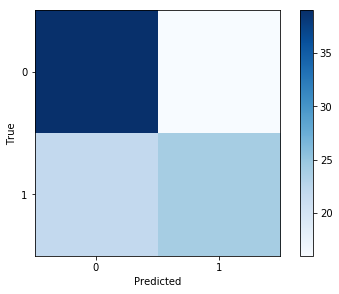

In [28]:
print_confusion_matrix()